In [14]:
! pip install openpyxl

  Using cached openpyxl-3.0.7-py2.py3-none-any.whl (243 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from numpy import log
from pandas import Series

In [2]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels as sm

In [59]:
# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns
from datetime import datetime
import subprocess
%matplotlib inline

In [37]:
data = pd.read_excel("df.xlsx",skiprows=list(range(0,10)), index_col=0, parse_dates=True)
data

,GOLDAMGBD228NLBM
observation_date,
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-15,1832.00
2021-07-16,1822.00
2021-07-19,1803.25


In [38]:
start_date = data.index[0]
end_date = data.index[-1]
dates = pd.date_range(start_date, end_date)
missing = []
nan_data = []

for date in dates:
    if date not in data.index:
        missing.append(date)
        nan_data.append(np.nan)
        
df = pd.DataFrame({"GOLDAMGBD228NLBM": nan_data}, index= missing)

df

,GOLDAMGBD228NLBM
1968-04-06,NaN
1968-04-07,NaN
1968-04-13,NaN
1968-04-14,NaN
1968-04-20,NaN
...,...
2021-07-04,NaN
2021-07-10,NaN
2021-07-11,NaN
2021-07-17,NaN


In [39]:
total_df = pd.concat([data, df])
total_df.sort_index(inplace= True)
total_df

,GOLDAMGBD228NLBM
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-17,NaN
2021-07-18,NaN
2021-07-19,1803.25
2021-07-20,1815.30


In [40]:
total_df.isnull().sum()

GOLDAMGBD228NLBM    5993
dtype: int64

In [41]:
df = total_df.interpolate(method ='linear', limit_direction ='forward', limit = 100)
df.isnull().sum()

GOLDAMGBD228NLBM    0
dtype: int64

In [42]:
df

,GOLDAMGBD228NLBM
1968-04-01,38.00
1968-04-02,37.60
1968-04-03,37.70
1968-04-04,36.70
1968-04-05,37.20
...,...
2021-07-17,1815.75
2021-07-18,1809.50
2021-07-19,1803.25
2021-07-20,1815.30


In [49]:
d = {'date': df.index, 'gold_price':df["GOLDAMGBD228NLBM"]}
df1 = pd.DataFrame(data=d)
df1.reset_index(inplace = True, drop = True)

In [50]:
df1

,date,gold_price
0,1968-04-01,38.00
1,1968-04-02,37.60
2,1968-04-03,37.70
3,1968-04-04,36.70
4,1968-04-05,37.20
...,...,...
19465,2021-07-17,1815.75
19466,2021-07-18,1809.50
19467,2021-07-19,1803.25
19468,2021-07-20,1815.30


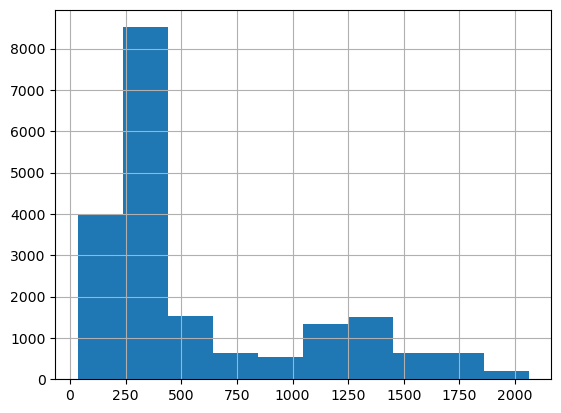

In [53]:
df1['gold_price'].hist()
plt.show()

In [54]:
log_transform = log(df1['gold_price'])
print(min(log_transform), max(log_transform))

3.5488987378095067 7.631189152146955


E:\gold_price\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


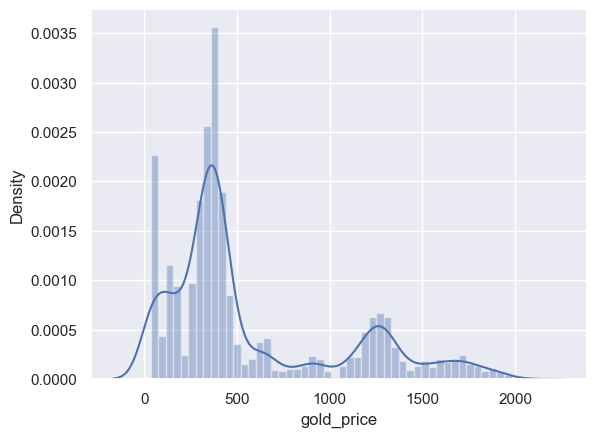

In [55]:
sns.set()
sns.distplot(df1['gold_price'])
plt.show()

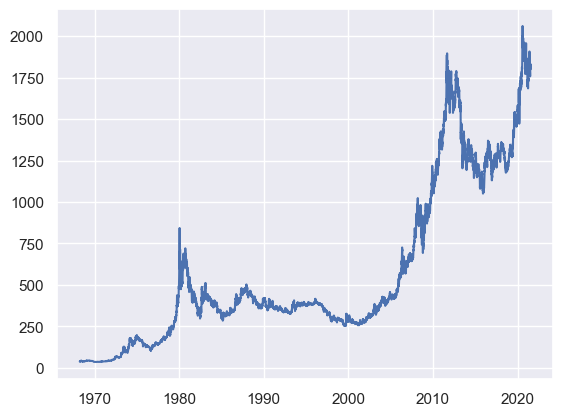

In [56]:
plt.plot(df1['date'], df1['gold_price'])
plt.show()

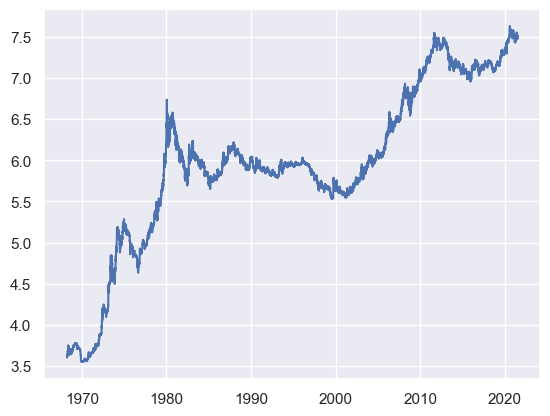

In [57]:
plt.plot(df1['date'], log_transform)
plt.show()

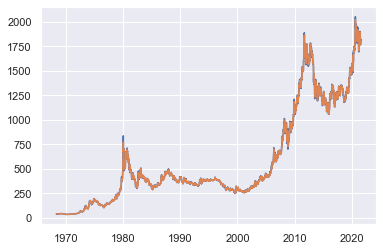

In [68]:
# Define exploratory variables
# Finding moving average of past 3 days and 9 days
df1['S_1'] = df1['gold_price'].shift(1).rolling(window=3).mean()
df1['S_2'] = df1['gold_price'].shift(1).rolling(window=9).mean()
df1['gold_predict'] = df1['gold_price'].shift(-1)
df1 = df1.dropna()
X = df1[['S_1', 'S_2']]
X.head()
plt.plot(df1['date'], df1['S_1'])
plt.plot(df1['date'], df1["S_2"])
plt.show()


In [69]:
# dependent variable
y = df1['gold_predict']
y.shape

(19424,)

In [70]:
X.shape

(19424, 2)

In [71]:
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

Gold Price = 1.21 * 2 Month Moving Average -0.21 * 1 Month Moving Average + -0.04


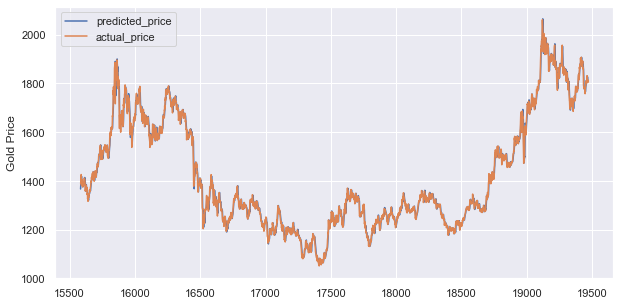

R square for regression 99.34


18.618700401276342

In [72]:
# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y_test,predicted_price))

In [75]:
# Check stationarity
X = df1['gold_price']
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

result_of_adfuller = adfuller(df1['gold_price'])
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

mean1=278.160006, mean2=870.789184
variance1=25661.365251, variance2=269362.481174
ADF Statistic: 0.488149
p-value: 0.984508
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [76]:
# Now taking log transform
log_transform = log(df1['gold_price'])
result_of_adfuller = adfuller(log_transform)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.687983
p-value: 0.437314
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


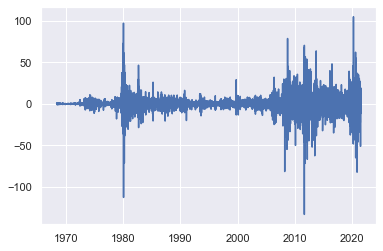

ADF Statistic: -22.368812
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [77]:
# To remove trends, differencing of order 1
k = df1['gold_price'].diff()
plt.plot(df1['date'], k)
plt.show()
# print(k.head())
k = k.dropna()

# check stationarity after differencing
result_of_adfuller = adfuller(k)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))